# Prediction of Surivaval of Titanic Passengers

Predicting a classification (survival or deceased) using Logistic Regression in Python

### Import Libraries

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the Data

In [3]:
file_path = os.path.abspath('D:\Jupyter Notebooks\Karachi AI\Python')
train = pd.read_csv('titanic1.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

### Missing Data

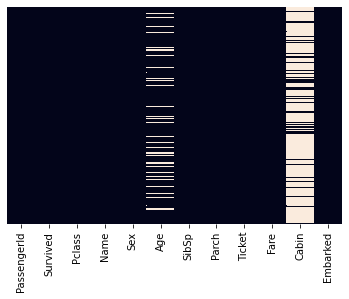

In [4]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

It is evident from the heatmap, most of the null values are present in Age and Cabin columns. 

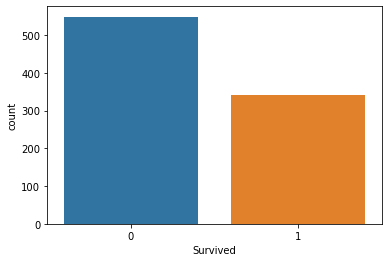

In [5]:
sns.countplot(x='Survived', data=train)

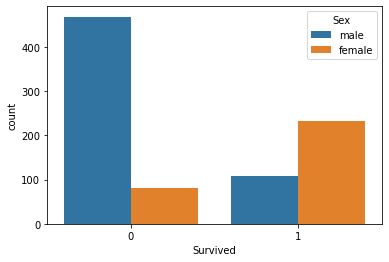

In [6]:
sns.countplot(x='Survived', hue='Sex', data=train)

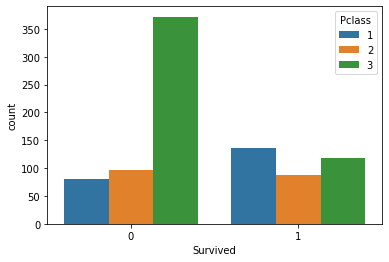

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=train)

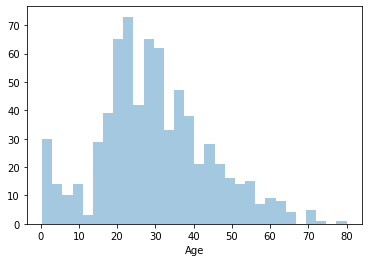

In [8]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

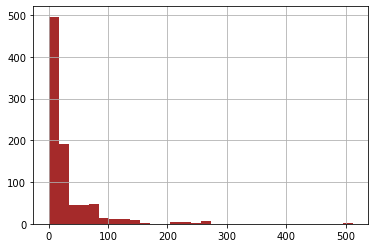

In [9]:
train['Fare'].hist(bins=30, color='brown')

### Data Cleaning

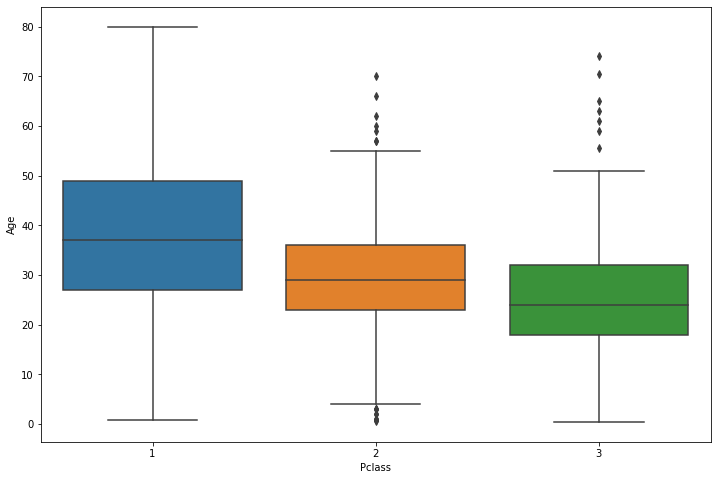

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass', y='Age', data=train)

It can be seen from the above boxplot that the mean for Class 1 corresponds to 37, Class 2 corresponds to 29, Class 3 corresponds to 24 respectively

In [11]:
train.apply(lambda x : x.isnull().sum()) # Shows missing values in all attributes

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
def age_impute(col):
    Age=col[0]
    Pclass=col[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37 # mean of Pclass 1
        
        if Pclass == 2:
            return 29 # mean of Pclass 2
    
        if Pclass == 3:
            return 24 # mean of Pclass 3
        
    else: 
        return Age

In [13]:
train['Age'] = train[['Age', 'Pclass']].apply(age_impute,axis=1)

In [14]:
train.apply(lambda x : x.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
train.drop('Cabin', axis=1, inplace=True) 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


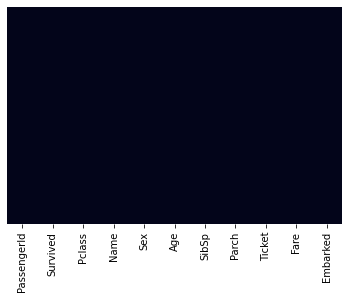

In [16]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

No Null values exist. Now the data has been successfully cleaned

### Converting Categorical Features 

In [17]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [18]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [19]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [20]:
train=pd.concat([train, sex, embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Building the Logistic Regression Model

Survived column is the depandant variable (vairable to be predicted), whereas
the rest are independant variables. So first, performing Train-Test split

In [21]:
y = train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [22]:
x = train.drop('Survived',axis=1)
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                   random_state=101)

### Training and Predicting the Model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
predictions = logmodel.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
accuracy=confusion_matrix(y_test,predictions)

In [30]:
accuracy

array([[133,  21],
       [ 42,  72]], dtype=int64)

In [35]:
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[133,  21],
       [ 42,  72]], dtype=int64)

<Figure size 432x288 with 0 Axes>

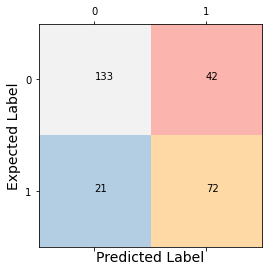

In [37]:
plt.figure()
plt.matshow(confusion_matrix, cmap='Pastel1')

for x in range(0,2):
    for y in range(0,2):
        plt.text(x,y, confusion_matrix[x,y])
        
plt.ylabel('Expected Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()

In [38]:
TP = 72 #we correctly predicted that they survived
TN = 133 #we correctly predcited that they didn't survive
FN = 21 #we incorrectly precdicted that they didn't survive
FP = 42 #we incorrectly predicted that they survived

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy=accuracy_score(y_test,predictions)
accuracy

The Accuracy of our Logistic Regression Model comes out to be 76.5%